In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Build Discriminator and Generator

In [4]:
x_ = tf.placeholder(tf.float32, shape=[None,1])
z_ = tf.placeholder(tf.float32, shape=[None,1])

In [5]:
w1 = tf.Variable(tf.random_uniform([1,10], -1, 1))
w2 = tf.Variable(tf.random_uniform([10,1], -1, 1))
b1 = tf.Variable(tf.random_normal([10]))
b2 = tf.Variable(tf.random_normal([1]))

In [6]:
A2_real = tf.sigmoid(tf.matmul(x_, w1) + b1)
D_real = tf.sigmoid(tf.matmul(A2_real, w2) + b2)

In [7]:
w1_G = tf.Variable(tf.zeros([1,10]))
w2_G = tf.Variable(tf.random_uniform([10,1], -1, 1))
b1_G = tf.Variable(tf.zeros([10]))
b2_G = tf.Variable(tf.random_uniform([1],-10,10))

In [8]:
Z2 = tf.sigmoid(tf.matmul(z_, w1_G) + b1_G)
G = tf.matmul(Z2, w2_G) + b2_G

In [9]:
A2_fake = tf.sigmoid(tf.matmul(G, w1) + b1)
D_fake = tf.sigmoid(tf.matmul(A2_fake, w2) + b2)

# Calculate Cost Function and Train Model

In [10]:
cost_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_fake))
cost_G = tf.reduce_mean(tf.log(1-D_fake))

In [11]:
train_D = tf.train.GradientDescentOptimizer(0.5).minimize(-cost_D, var_list = [w1,w2,b1,b2])
train_G = tf.train.GradientDescentOptimizer(0.5).minimize(cost_G, var_list = [w1_G,w2_G,b1_G,b2_G])

# Prepare Real Data and Fake Data

In [12]:
# x = np.random.normal(loc=3., scale = 1.5, size=[5000, 1])
x = np.random.uniform(low = -5, high=5, size=[5000,1])
z = np.random.rand(5000,1)

# Train this model

In [13]:
sess = tf.Session()

In [14]:
init = tf.initialize_all_variables()
sess.run(init)

In [15]:
k = 10
minibatch_size_1 = 100
minibatch_size_2 = 100
for i in range(10000):
    for _ in range(k):
        minibatch_idx = np.random.choice(range(len(x)), size=minibatch_size_1, replace=False)
        sess.run(train_D, feed_dict={x_: x[minibatch_idx], z_:z[minibatch_idx]})
    
    if i%1000 == 0:
        print('cost_D ', sess.run(cost_D, feed_dict={x_: x, z_:z}))
    
    minibatch_idx = np.random.choice(range(len(x)), size=minibatch_size_2, replace=False)
    
    sess.run(train_G, feed_dict={z_ :z[minibatch_idx]})
    if i%1000 == 0:
        print('cost_G ', sess.run(cost_G, feed_dict={z_ :z}))

('cost_D ', -0.51068306)
('cost_G ', -0.16362374)
('cost_D ', -0.0014460374)
('cost_G ', -0.00068749773)
('cost_D ', -1.3857336)
('cost_G ', -0.68588221)
('cost_D ', -1.3871423)
('cost_G ', -0.69457966)
('cost_D ', -1.3910439)
('cost_G ', -0.69170046)
('cost_D ', -1.3853028)
('cost_G ', -0.69423276)
('cost_D ', -1.3865278)
('cost_G ', -0.68485868)
('cost_D ', -1.3855059)
('cost_G ', -0.6962626)
('cost_D ', -1.3855773)
('cost_G ', -0.69499278)
('cost_D ', -1.3857663)
('cost_G ', -0.69645512)


# Plot the Real Distribution and Generated Distribution

In [16]:
x_test = np.linspace(-6,8,num = 100).reshape(-1, 1)
D_test = sess.run(D_real, feed_dict={x_ : x_test})
G_test = sess.run(G, feed_dict={z_ :z})

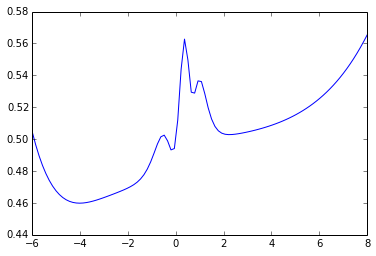

In [17]:
plt.plot(x_test,D_test)

(array([ 550.,  508.,  484.,  474.,  467.,  477.,  489.,  465.,  503.,  583.]),
 array([-4.91183281, -3.9351511 , -2.95846939, -1.98178768, -1.00510597,
        -0.02842426,  0.94825745,  1.92493916,  2.90162086,  3.87830257,
         4.85498428]),
 <a list of 10 Patch objects>)

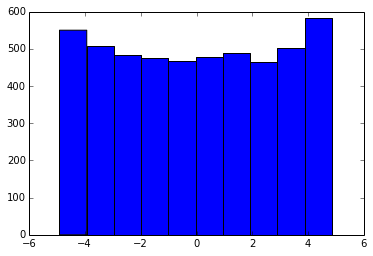

In [18]:
plt.hist(G_test)
# plt.xlabel('Generated data')
# plt.savefig('G_uniform.jpg')

(array([ 489.,  495.,  510.,  468.,  508.,  532.,  505.,  472.,  501.,  520.]),
 array([ -4.99983727e+00,  -3.99990955e+00,  -2.99998184e+00,
         -2.00005413e+00,  -1.00012641e+00,  -1.98698378e-04,
          9.99729015e-01,   1.99965673e+00,   2.99958444e+00,
          3.99951216e+00,   4.99943987e+00]),
 <a list of 10 Patch objects>)

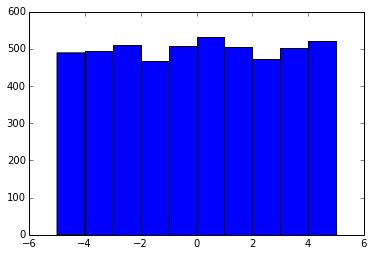

In [19]:
plt.hist(x)
# plt.xlabel('Real data')
# plt.savefig('uniform.jpg')

# Use Parzen Window to calculate the distribution

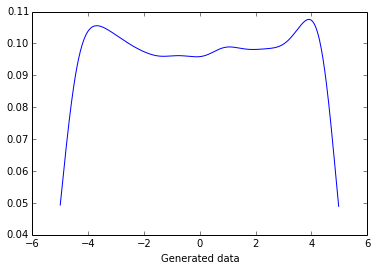

In [22]:
h = 0.5
X = np.arange(-5, 5, 0.02)

# for each point in x, we have compute its pdf
Y = np.array([])
N = len(G_test)

for x_window in X:
    t = 0
    for xi in G_test:
        t += np.exp(-(x_window-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
plt.xlabel('Generated data')
plt.savefig('G_uniform.jpg')
plt.show()

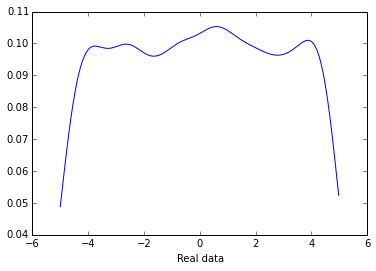

In [23]:
h = 0.5
X = np.arange(-5, 5, 0.02)

# for each point in x, we have compute its pdf
Y = np.array([])
N = len(x)

for x_window in X:
    t = 0
    for xi in x:
        t += np.exp(-(x_window-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
plt.xlabel('Real data')
plt.savefig('uniform.jpg')
plt.show()

# Calculate the KL divergence

In [26]:
kl = 0
for i in range(5000):
    kl = kl + x[i]*np.log(np.absolute(x[i]/G_test[i]))
print kl

[-469.5045185]
